In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [4]:
tf.__version__

'2.8.0'

In [5]:
import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

Create an empty Model, to which we can add layers one after the other

Start by importing the Sequential Model from Keras

In [ ]:
model = Sequential()

Now, we need to add layers to the model.

First, let us add the simple dense layer(MLP) to the model 

In [ ]:
model.add(Dense(100,input_dim=10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
Total params: 1,100
Trainable params: 1,100
Non-trainable params: 0
_________________________________________________________________


We can add many more layers using model.add(layer_type)

In [ ]:
model.add(Dense(10))

The structure of the neural network can be printed by calling `model.summary()`.

It prints the information about

*   Input and output shapes
*   Layer-wise information
*   Number of parameters in the neural network



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 2,110
Trainable params: 2,110
Non-trainable params: 0
_________________________________________________________________


Keras also supports a variety of activation functions. The activation function of any previous layer can be modified by add the required activation function after it 


In [ ]:
model.add(Activation('relu'))

**General Activation Functions in Keras**

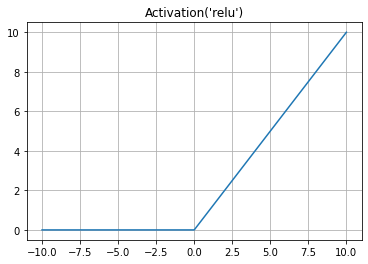

In [ ]:
x = np.linspace(-10,10,1000)
y = np.where(x>0,x,0)
plt.plot(x,y)
plt.title("Activation('relu')")
plt.grid(True)
plt.show()

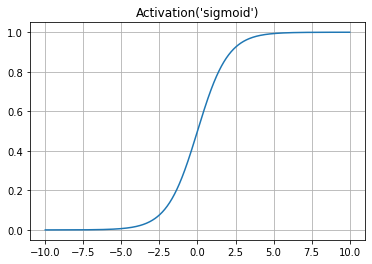

In [ ]:
x = np.linspace(-10,10,1000)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title("Activation('sigmoid')")
plt.grid(True)
plt.show()

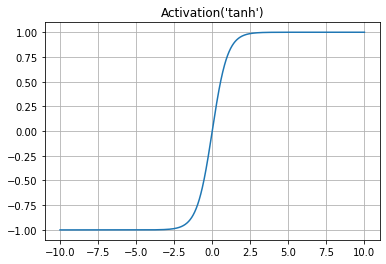

In [ ]:
x = np.linspace(-10,10,1000)
y = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
plt.plot(x,y)
plt.title("Activation('tanh')")
plt.grid(True)
plt.show()

Now, if we call model.summary(), we can see the new activation layer added to it

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 2,110
Trainable params: 2,110
Non-trainable params: 0
_________________________________________________________________


Below is a neural network with normal activation function.

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=10))
model.add(Dense(10))


Below is a neural network with ReLU activation function in the end

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=10))
model.add(Dense(10))
model.add(Activation('relu'))

Below is a neural network with Softmax activation function in the end

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=10))
model.add(Dense(10))
model.add(Activation('softmax'))

Activation functions can be added anywhere(even in the middle)

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=10))
model.add(Activation('relu'))
model.add(Dense(10))

There can be multiple activation functions in a neural network

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Once the model structure has been finalized, we need to set the parameters of the model such as

1.   `loss`
2.   `optimizer`
3.   `metrics`
4.   So on


These parameters are set using model.compile(parameters)





In [ ]:
# The below function makes sure that the model minimizes the mean squared error using Stochastic Gradient Descent
model.compile(loss='mse',optimizer='sgd')


Keras also has a variety of loss functions and optimizers.

Loss functions


1.   `loss='mse'` means mean squared error
2.   `loss='binary_crossentropy'` means binary classification loss
3.   `loss='categorical_crossentropy'` means multiclass loss

Optimizers

1.   `optimizer='sgd'` means stochastic gradient descent
2.   `optimizer='adam'` means adam optimizer





In [ ]:
# The model minimizers the binary cross entrypy loss using adam optimizer
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
X = np.random.random((1000,10))
y = np.random.random((1000,1))

Create a model

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=10))
model.add(Dense(10))
model.add(Dense(1))

Specify the loss and the optimizer

In [ ]:
model.compile(loss='mse',optimizer='sgd')

Fit the model on the input data

In [ ]:
history = model.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 985us/step - loss: 0.1517
Epoch 2/100
32/32 [==============================] - 0s 953us/step - loss: 0.0975
Epoch 3/100
32/32 [==============================] - 0s 962us/step - loss: 0.0912
Epoch 4/100
32/32 [==============================] - 0s 966us/step - loss: 0.0878
Epoch 5/100
32/32 [==============================] - 0s 940us/step - loss: 0.0863
Epoch 6/100
32/32 [==============================] - 0s 964us/step - loss: 0.0840
Epoch 7/100
32/32 [==============================] - 0s 918us/step - loss: 0.0836
Epoch 8/100
32/32 [==============================] - 0s 976us/step - loss: 0.0826
Epoch 9/100
32/32 [==============================] - 0s 970us/step - loss: 0.0825
Epoch 10/100
32/32 [==============================] - 0s 955us/step - loss: 0.0822
Epoch 11/100
32/32 [==============================] - 0s 988us/step - loss: 0.0825
Epoch 12/100
32/32 [==============================] - 0s 974us/step - loss: 0.0816
Epoch 13/100


One can get the predictions using

In [ ]:
predictions = model.predict(X)
print (predictions)

Evaluation predictions from the trained model

In [ ]:
print ("Loss: ",mean_squared_error(y, predictions))

Loss:  0.08432450763663446


**Worked out example for a classification task**

First, let us create random data

In [ ]:
X = np.random.random((1000,10))
y = np.random.random((1000,1))
y = np.where(y>0.5,1,0)

Create the model architecture

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=10))
model.add(Dense(10))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Specify the losses and the optimizers

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X,y,epochs=100)

Get the predcited class probabilities

In [ ]:
class_probabilities = model.predict(X)
print (class_probabilities)

[[0.5000736 ]
 [0.5357791 ]
 [0.55982673]
 [0.51425886]
 [0.49815375]
 [0.44043645]
 [0.4035288 ]
 [0.50842625]
 [0.4693084 ]
 [0.44975725]
 [0.3696246 ]
 [0.38270336]
 [0.3965813 ]
 [0.4335871 ]
 [0.51404953]
 [0.4243894 ]
 [0.4589637 ]
 [0.44522563]
 [0.5072384 ]
 [0.42369515]
 [0.5037421 ]
 [0.44513705]
 [0.4860922 ]
 [0.49892116]
 [0.50371975]
 [0.47600275]
 [0.56681305]
 [0.46908188]
 [0.44884828]
 [0.51284   ]
 [0.4875115 ]
 [0.48140272]
 [0.45178112]
 [0.50376934]
 [0.59596765]
 [0.47805494]
 [0.42123142]
 [0.4411848 ]
 [0.6178582 ]
 [0.48454592]
 [0.4250629 ]
 [0.48045027]
 [0.3657426 ]
 [0.48731476]
 [0.5769033 ]
 [0.5386795 ]
 [0.5044595 ]
 [0.39372042]
 [0.5042223 ]
 [0.47444108]
 [0.510188  ]
 [0.44217566]
 [0.49480668]
 [0.45093793]
 [0.41141516]
 [0.5866512 ]
 [0.38980612]
 [0.49302423]
 [0.47874793]
 [0.5394682 ]
 [0.5904436 ]
 [0.4937482 ]
 [0.49275178]
 [0.5250658 ]
 [0.5832342 ]
 [0.5887569 ]
 [0.46065548]
 [0.56438106]
 [0.48130572]
 [0.44621456]
 [0.46842912]
 [0.60

In [ ]:
classes = np.where(class_probabilities>0.5,1,0)
print (classes)
print ("Accuracy: ",accuracy_score(y,classes))

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]


**Gradient Descent vs Stochastic Gradient Descent vs Batch Gradient Descent**

Gradient Descent


1.   Gradient is computed over all the training examples
2.   Weights are updated once after computing the gradient on the whole training data

Stochastic Gradient Descent



1.   Gradient is computed for every sample in the training set.
2.   Weights are updated after we compute the gradient on each sample

Batch Gradient Descent



1.   Gradient is computed over a batch of samples
2.   Weights are updated once every batch







**Stochastic Gradient Descent in Keras**

A Keras model can be configured to use stochastic gradient descent by setting the `batch_size=1` while calling the fit. SGD is nothing but batch gradient descent where batch size equals 1.

In [ ]:
model.fit(X,y, batch_size=1) # SGD

Train on 1000 samples
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7036 - accuracy: 0.5060


**Mini-Batch Gradient Descent in Keras**

A Keras model can be configured to use mini-batch gradient descent by specifying the `batch_size` parameter while calling the fit. 


In [ ]:
model.fit(X,y, batch_size=256) # Trains the model using batches of size 256

Train on 1000 samples
1000/1000 [==============================] - 0s 20us/sample - loss: 0.6918 - accuracy: 0.5240


**Batch Gradient Descent in Keras**

A Keras model can be configured to use batch gradient descent by specifying the `batch_size` parameter to the size of the training set. 


In [ ]:
model.fit(X,y, batch_size=len(x)) # This trains the model using batch gradient descent method

Train on 1000 samples
1000/1000 [==============================] - 0s 177us/sample - loss: 0.6914 - accuracy: 0.5320


**Multiclass Classification Task**

In [6]:
X = np.random.random((1000,100))
y = np.random.random((1000,10))
y = y/np.sum(y,axis=1).reshape((-1,1))
y = np.argmax(y,axis=1)

Now, we need to one-hot encode the variables

In [10]:
from tensorflow.keras.utils import *

In [11]:
y_ = to_categorical(y, num_classes=10)

In [12]:
model = Sequential()
model.add(Dense(256,input_dim=100))
model.add(Dense(128))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [14]:
model.fit(X,y_, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.3823 - accuracy: 0.1020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3468 - accuracy: 0.1040
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3284 - accuracy: 0.1230
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3232 - accuracy: 0.1190
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3063 - accuracy: 0.1300
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2906 - accuracy: 0.1340
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2853 - accuracy: 0.1370
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2682 - accuracy: 0.1400
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2588 - accuracy: 0.1580
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2426 - accuracy: 0.1700
Epoch 11/

In [15]:
predicted_proba = model.predict(X)
print (predicted_proba)

[[0.04668155 0.22463222 0.10078587 ... 0.01951952 0.00926917 0.12959634]
 [0.17442153 0.05828118 0.01188225 ... 0.03316174 0.27091923 0.10015026]
 [0.09559499 0.15432109 0.19554348 ... 0.04253871 0.10088371 0.05937949]
 ...
 [0.00836749 0.16299829 0.04778055 ... 0.0774572  0.03851362 0.3718182 ]
 [0.05931693 0.07941449 0.08408352 ... 0.06290583 0.09731365 0.04628014]
 [0.01805338 0.02043756 0.00462108 ... 0.21442842 0.03368051 0.04681179]]


In [ ]:
predicted_classes = np.argmax(predicted_proba,axis=1)
print (predicted_classes)
print (accuracy_score(y,predicted_classes))

[1 8 9 3 9 8 6 7 9 6 7 2 8 0 1 5 0 3 2 3 1 1 2 5 8 6 9 6 7 8 8 1 8 6 0 0 5
 9 1 9 1 3 0 0 5 0 0 7 0 0 0 8 7 0 6 2 9 2 1 3 8 7 4 7 8 3 1 9 7 6 8 8 0 1
 8 8 6 0 8 2 8 7 2 6 2 8 7 7 5 2 0 1 6 5 7 9 9 8 8 5 7 0 0 7 0 4 7 0 0 0 6
 1 8 8 8 8 8 1 7 7 0 7 8 6 8 7 0 9 0 0 8 9 5 4 5 3 8 5 2 1 8 5 7 7 8 8 4 8
 5 0 7 1 9 0 8 5 9 0 8 8 7 8 7 0 2 6 5 1 0 3 1 8 2 5 6 0 2 1 7 5 9 5 3 7 3
 9 6 8 0 2 5 7 8 7 8 8 8 6 0 7 1 8 4 1 1 0 8 6 3 8 0 0 0 0 7 0 5 0 2 3 8 1
 8 8 3 8 5 0 3 2 7 7 7 8 1 9 8 8 1 0 1 1 6 8 7 8 1 1 0 8 9 0 0 2 1 0 8 8 8
 9 8 8 6 1 3 1 0 9 1 7 8 5 7 5 0 9 1 8 0 7 9 1 9 8 0 8 0 8 0 8 9 9 5 9 1 3
 9 1 6 2 5 3 0 7 8 8 9 8 5 0 1 1 0 1 1 7 8 6 5 5 8 1 2 5 0 1 7 0 8 2 8 3 0
 0 2 8 0 8 0 7 0 0 3 0 2 3 9 0 2 8 8 1 8 0 0 9 7 9 0 0 6 0 2 5 9 1 6 1 1 8
 7 8 2 5 0 8 9 3 8 0 0 0 9 2 5 3 8 2 8 8 0 6 2 0 8 4 1 6 0 5 3 5 2 0 0 1 9
 1 9 7 2 4 0 6 7 5 1 4 0 3 0 5 7 8 0 7 8 6 9 1 8 0 1 9 9 0 0 7 3 1 8 7 0 1
 8 6 8 8 0 7 4 5 2 7 9 2 0 9 0 2 7 8 1 2 9 6 5 8 8 6 2 0 2 8 8 1 5 5 7 5 1
 1 8 7 0 6 1 8 0 2 0 7 8 